# Wine Quality Prediction:

# Problem Statement:

![title](wine.png)

![title](summerwhiteshutterlong.jpg)

## Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). 

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. 


## Attribute Information:
For more information, read [Cortez et al., 2009]. 
Input variables (based on physicochemical tests): 
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 
Output variable (based on sensory data): 
12. quality (score between 0 and 10)

## Solution/Approach
#### Steps
1. Reading csv/tsv etc file and then checking dimension,few rows to know little about data etc
2. Variable identification to know about <b>continuous or categorical in nature</b>
3. Univariate analysis<br/>
    A. Continuous Variables<br/>
    Tabular and graphical method is used to know about <b>mean,median,mode,missing values,Q1,Q3,skewness,outliers</b> etc
    
    B. Categorical Variables<br/>
    Tabular and graphical method is used to know about number of times each value occuring in that particular column<br/>
    <br/>
4. Bivariate analysis<br/>
    Tabular and graphical method is used to know about relation between continuous-continuous variables using            
    <b>correlation</b>,categorical-continuous variables using bar plot.
5. Outliers Treatment:<br/>
    Using <b>box plot</b>, i am able to find outliers then using <b>Q1-1.5(Q3-Q1)</b> and <b>Q3+1.5(Q3-Q1)</b> , i am replacing     that outliers with mean.
6. Variable Transormation:<br/>
    According to <b>left or right skewness</b>, transforming variables by using log,square,cube,<b>Normalization</b> etc to     obtain <b>symmetrical distrribution</b>
    
7. Modeling:<br/>
   a.Separating indepedent and dependent variable from our data set<br/><br/>
   <b>8.1 Logistic Regression</b><br/>
     b.Train test split<br/>
     c.<b> K Fold Cross Validation</b><br/><br/>
   <b>8.2 K Nearest Neighbour</b><br/>
     d.Train test split<br/>
     e.K Fold Cross Validation<br/>
     f.<b> Varying K of KNN</b><br/><br/>
   <b>8.3 Decision Tree/Random Forest</b><br/>
     g.Train test split<br/><br/>
   h.Predicting the value for each of the above techniq<br/>
   f.Finally compare the <b>accuracy</b> of each of the model.<br/>

## 1. Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Exploring Dataset:

In [2]:
# reading csv file

white=pd.read_csv('winequality-white.csv',delimiter=';')
white1=pd.read_csv('winequality-white.csv')
red=pd.read_csv('winequality-red.csv')

In [3]:
# checking dimension

white.shape,white1.shape,red.shape

((4898, 12), (4898, 1), (1599, 1))

In [4]:
# first five rows (see difference between white and white1)

white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# in our csv file we have only one column and values are separated by delimiter

white1.head(3)

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...


In [6]:
# there are two different wine data set one for red and another for white so i am exploring only white dataset

red.head(3)

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...


In [7]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## 3. Variables Identification:

In [8]:
white.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Observations :
1. Out of 12 columns first 11 columns are <b>continuous variables</b> and only last columns ('quality') is <b>categorical</b> or object variable but value is present in numerical form that's why int64

## 4. Univariate Analysis:

#### A. Continuous Variables:

In [9]:
# tabular form

white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Observations :
1. There is very much less difference between minimum and maximum values for every columns except 'free sulfur dioxide' and 'total sulfur dioxide'
2. For above all columns we don't have any single <b>NULL</b> value

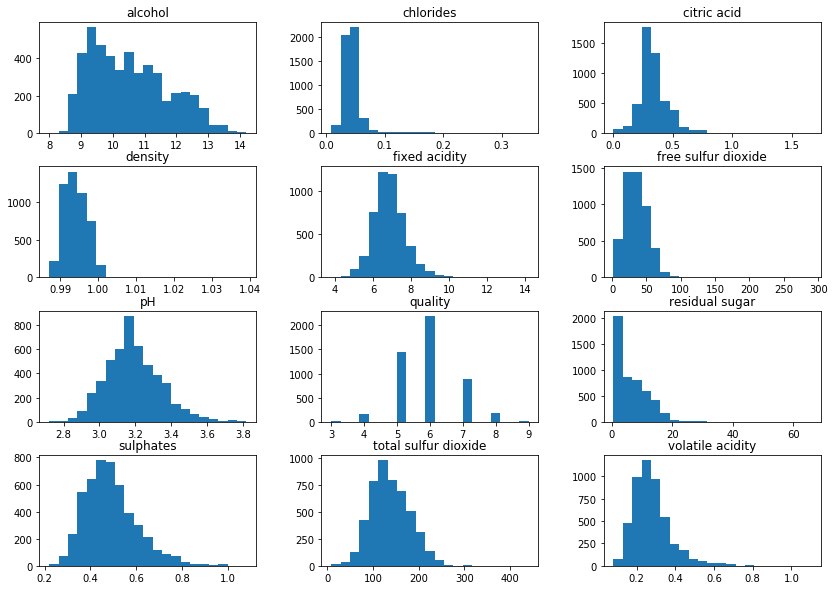

In [10]:
white.hist(figsize=(14,10),bins=21,grid=False)
plt.show()

## Observations:
1. we are not concerned about 'quality' variable at this point b'coz it is categorical in nature
2. All above plot are positive skew except 'citric acid','fixed acidity' and these two are little bit symmetric in nature

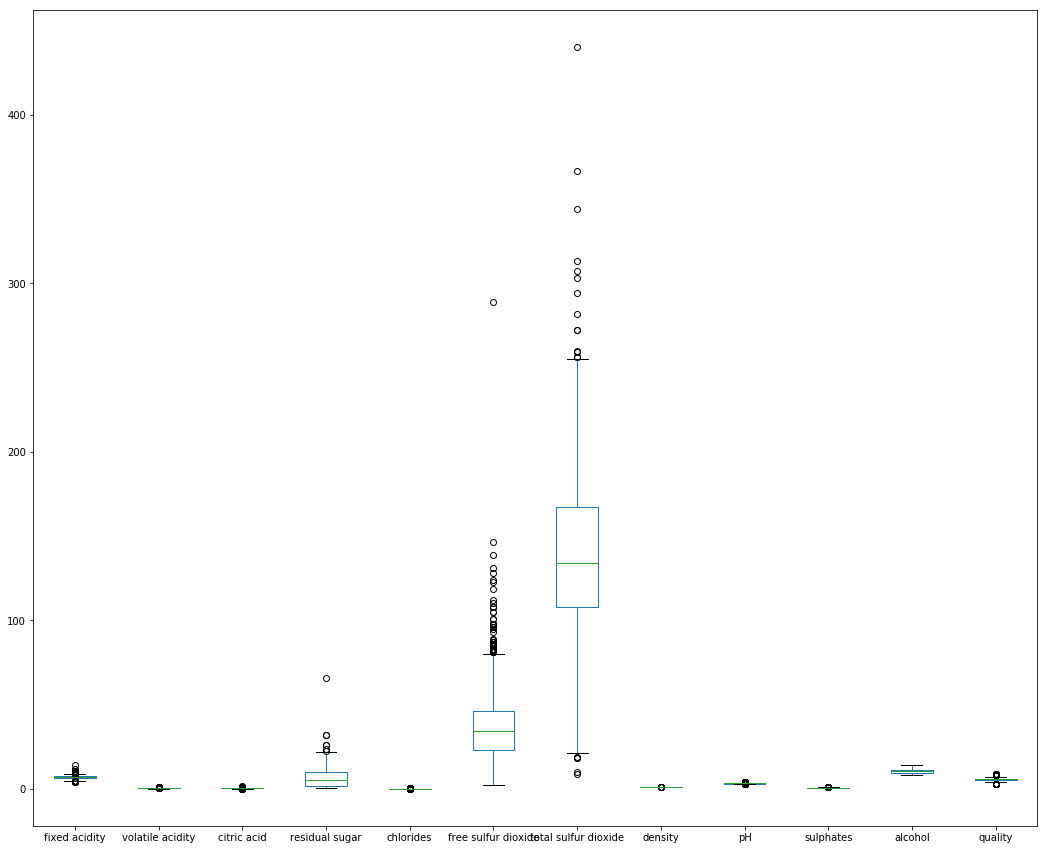

In [11]:
white.plot.box(figsize=(18,15))
plt.show()

## Observations :
1. Almost all the variables have outliers except alcohol 
2. I will treat these outliers in outlier treatment section

#### B. Categorical variable:

In [12]:
# number of times each of the different value are appearing in column 'quality'

white['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [13]:
# so total sum is equal to number of rows

white['quality'].value_counts().sum()

4898

In [14]:
# it gives proportion

white['quality'].value_counts(normalize=True)

6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: quality, dtype: float64

In [15]:
# sum becomes equal to 1

white['quality'].value_counts(normalize=True).sum()

1.0

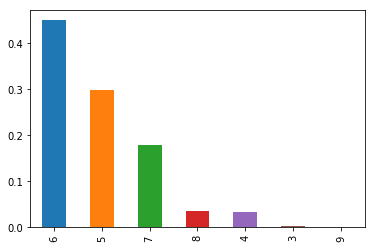

In [16]:

white['quality'].value_counts(normalize=True).plot.bar()

## Observations :
1. 3 and 9 are appearing very less in compare to other value

## 5. Bivariate Analysis:

#### A. continuous-continuous variables:

In [17]:
# checking degree of strength between different continuous variables

corr=white.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


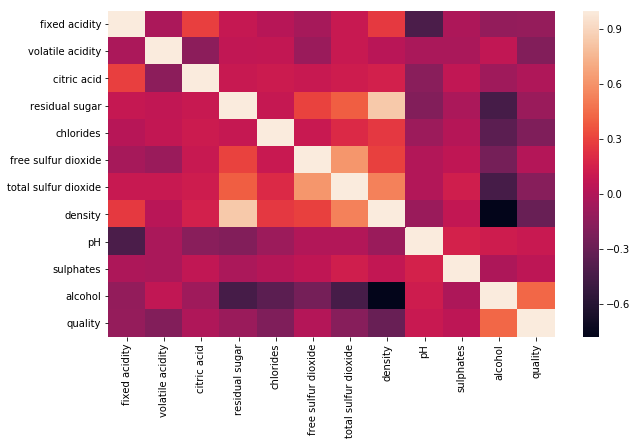

In [18]:
# now visualizing same thing in form of pictorial
# compare next two -three plot below

plt.figure(figsize=(10,6))
sns.heatmap(corr)
plt.show()

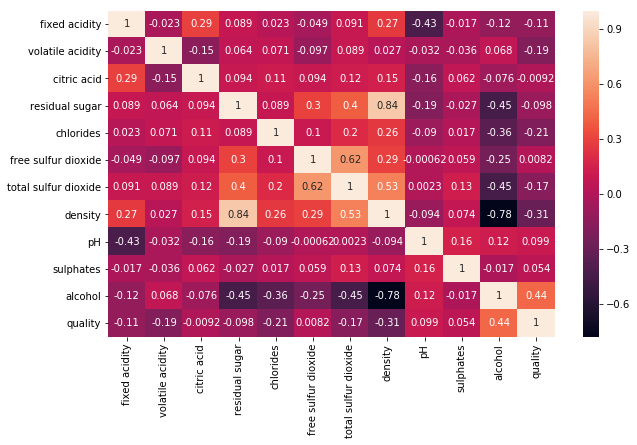

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

## Observation:

1. we can observe here(either from color variation or corr value) that density and residual sugar is strong relation ship b'coz corr value=0.84 and postively related
2. we can also observe that free sulphur dioxide and total sulphur dioxide have also positively strongly correlated

## Note:
Always <b>only</b> see upper or lower triangular matrix in heatmap plot b'coz it is symmetical

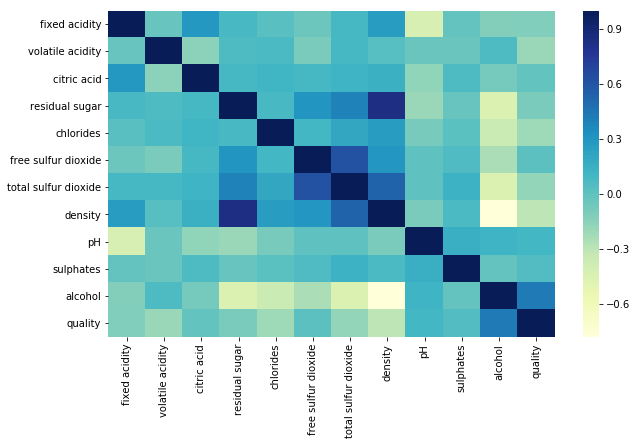

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,cmap="YlGnBu")
plt.show()

#### B. Categorical-continuous variables:

In [21]:
white.groupby('quality')['fixed acidity'].mean()

quality
3    7.600000
4    7.129448
5    6.933974
6    6.837671
7    6.734716
8    6.657143
9    7.420000
Name: fixed acidity, dtype: float64

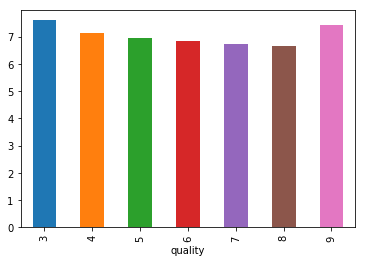

In [22]:
white.groupby('quality')['fixed acidity'].mean().plot.bar()

In [23]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

quality
3    7.600000
4    7.129448
5    6.933974
6    6.837671
7    6.734716
8    6.657143
9    7.420000
Name: fixed acidity, dtype: float64


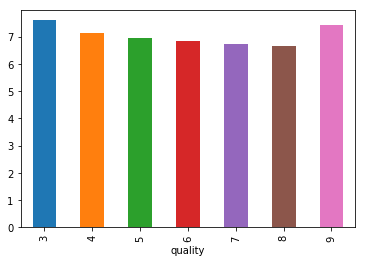

quality
3    0.333250
4    0.381227
5    0.302011
6    0.260564
7    0.262767
8    0.277400
9    0.298000
Name: volatile acidity, dtype: float64


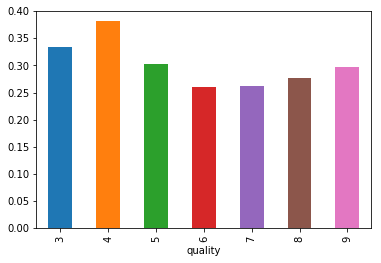

quality
3    0.336000
4    0.304233
5    0.337653
6    0.338025
7    0.325625
8    0.326514
9    0.386000
Name: citric acid, dtype: float64


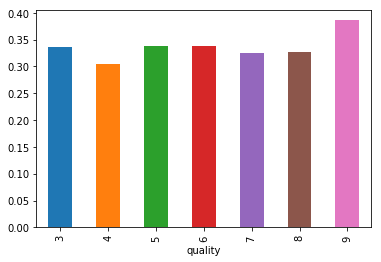

quality
3    6.392500
4    4.628221
5    7.334969
6    6.441606
7    5.186477
8    5.671429
9    4.120000
Name: residual sugar, dtype: float64


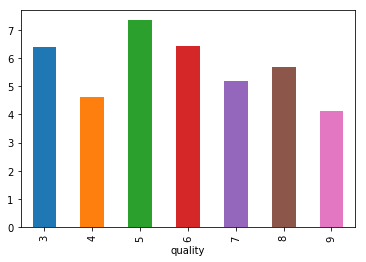

quality
3    0.054300
4    0.050098
5    0.051546
6    0.045217
7    0.038191
8    0.038314
9    0.027400
Name: chlorides, dtype: float64


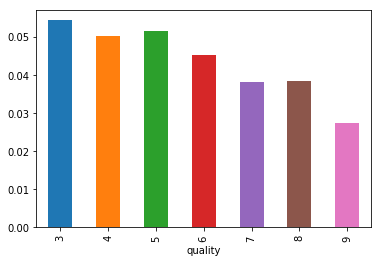

quality
3    53.325000
4    23.358896
5    36.432052
6    35.650591
7    34.125568
8    36.720000
9    33.400000
Name: free sulfur dioxide, dtype: float64


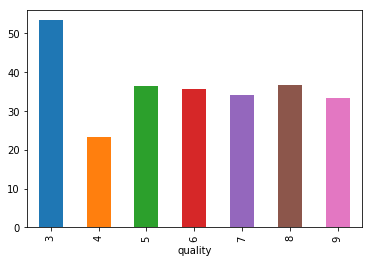

quality
3    170.600000
4    125.279141
5    150.904598
6    137.047316
7    125.114773
8    126.165714
9    116.000000
Name: total sulfur dioxide, dtype: float64


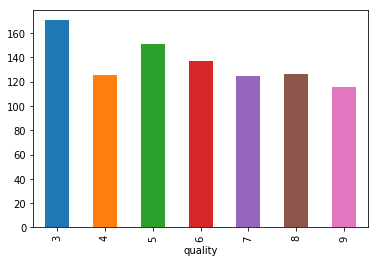

quality
3    0.994884
4    0.994277
5    0.995263
6    0.993961
7    0.992452
8    0.992236
9    0.991460
Name: density, dtype: float64


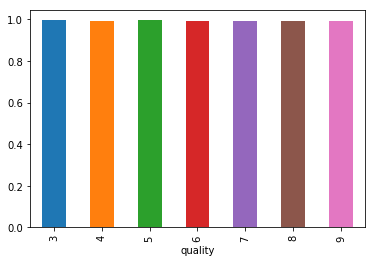

quality
3    3.187500
4    3.182883
5    3.168833
6    3.188599
7    3.213898
8    3.218686
9    3.308000
Name: pH, dtype: float64


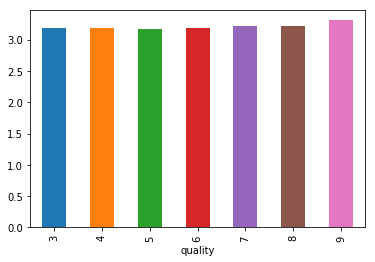

quality
3    0.474500
4    0.476135
5    0.482203
6    0.491106
7    0.503102
8    0.486229
9    0.466000
Name: sulphates, dtype: float64


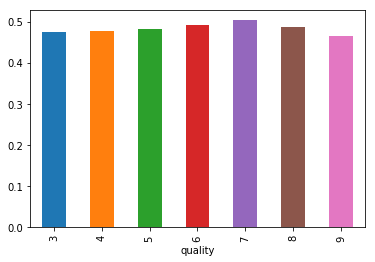

quality
3    10.345000
4    10.152454
5     9.808840
6    10.575372
7    11.367936
8    11.636000
9    12.180000
Name: alcohol, dtype: float64


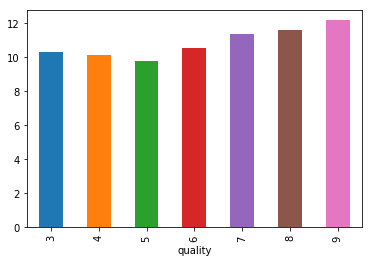

In [24]:
# plotting each of the graph in one go

columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
          'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']

for i in columns:
    #j=1
    print(white.groupby('quality')[i].mean())
    #plt.figure(figsize=(14,10))
    #plt.subplot(int(str(43)+str(j)))
    white.groupby('quality')[i].mean().plot.bar()
    plt.show()

## Observation:

1. In above bar plot we can see that each of the continuous variable playing equal role in deciding the quality of wine

## 6. Missing value Treatment:

1. As i had already observed in univariate analysis (4th step) section by using describe function that there is no missing value
in the data set

## 7. Outlier Treatment:

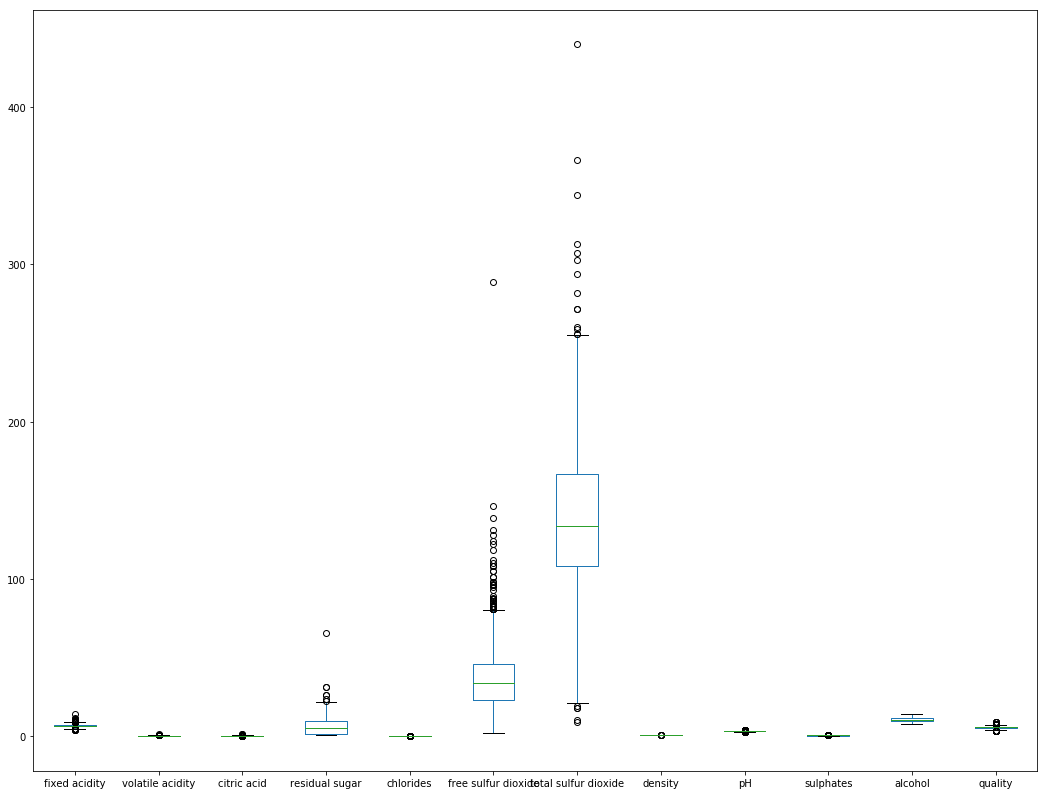

In [25]:
# in one single diagram we can check all box plot for each of the continuous variables

white.plot.box(figsize=(18,14))

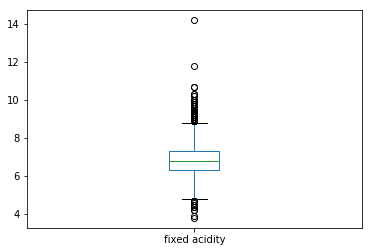

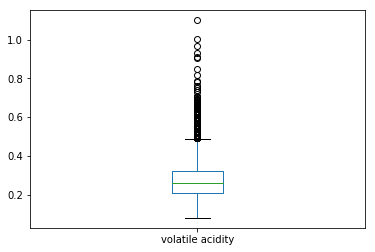

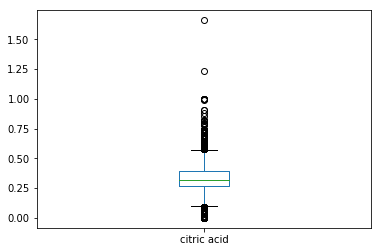

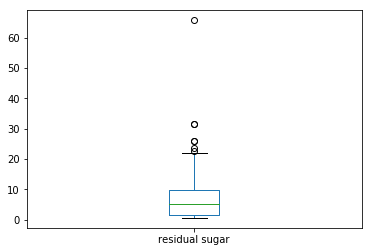

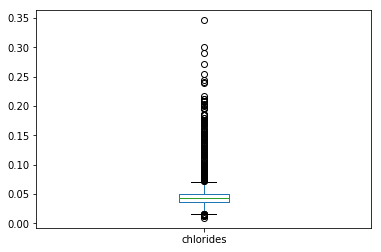

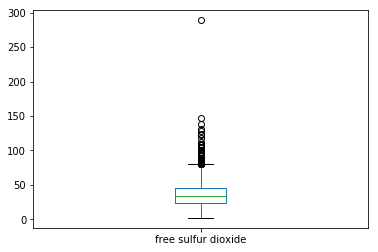

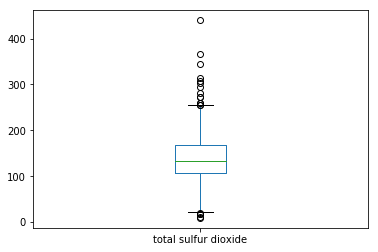

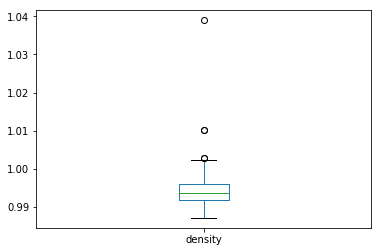

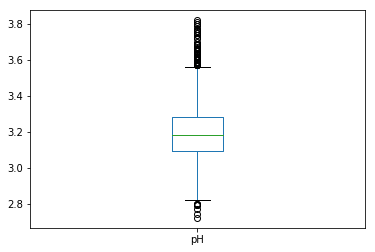

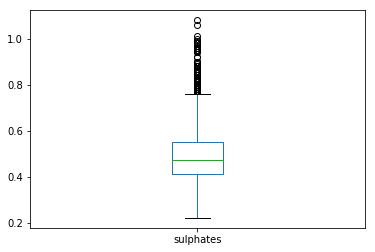

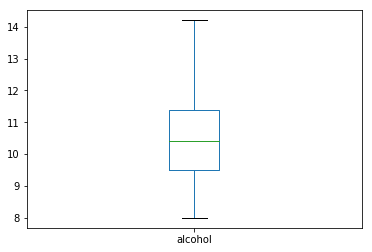

In [26]:
# separately each of the box plot for each of the feature so that we can clearly see outliers

columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
          'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']

for i in columns:
    white[i].plot.box()
    print()
    plt.show()

## Observations:
we can clearly see all the independent variables have <b>outliers</b> except alcohol

In [27]:
#for i in columns:
#   white.loc[(white[i]<((white[i].quantile(0.25))-1.5*(white[i].quantile(0.75)-white[i].quantile(0.25)))) | (white[i]<((white[i].quantile(0.75))+1.5*(white[i].quantile(0.75)-white[i].quantile(0.25)))),i]=white[i].median()
    

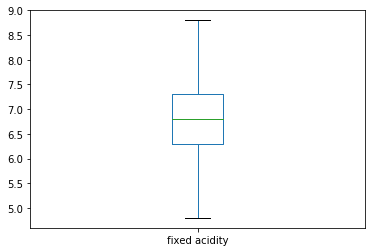

In [28]:
# i am using formula to remove outliers from top and bottom of box plot
# from top : Q3+1.5*(Q3-Q1)
# from bottom : Q1-1.5*(Q3-Q1)

# NOTE : we careful as Q3-Q1 doesnot equal to Q2 so don't use shortcut in above formula 

white.loc[(white['fixed acidity']<4.8) | (white['fixed acidity']>8.8),'fixed acidity']=white['fixed acidity'].median()
white['fixed acidity'].plot.box()

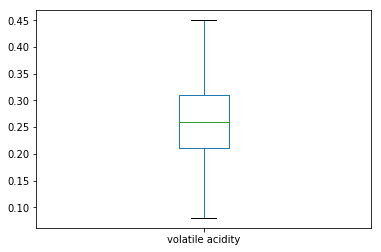

In [29]:
white.loc[white['volatile acidity']>0.45,'volatile acidity']=white['volatile acidity'].median()
white['volatile acidity'].plot.box()

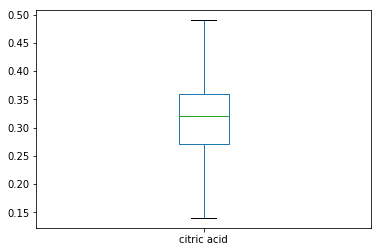

In [30]:
white.loc[(white['citric acid']<0.14) | (white['citric acid']>0.49),'citric acid']=white['citric acid'].median()
white['citric acid'].plot.box()

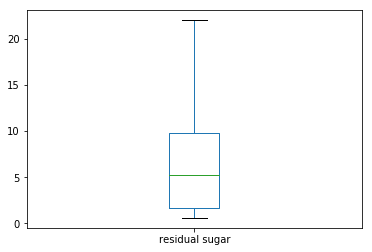

In [31]:
white.loc[(white['residual sugar']>22.2),'residual sugar']=white['residual sugar'].median()
white['residual sugar'].plot.box()

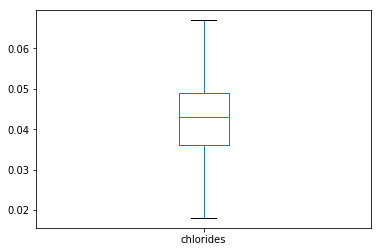

In [32]:
white.loc[(white['chlorides']<0.018) | (white['chlorides']>0.067),'chlorides']=white['chlorides'].median()
white['chlorides'].plot.box()

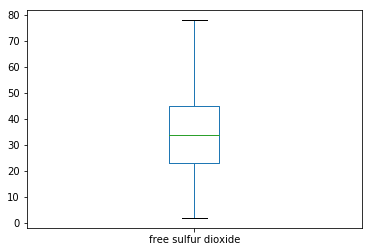

In [33]:
white.loc[(white['free sulfur dioxide']>78.0),'free sulfur dioxide']=white['free sulfur dioxide'].median()
white['free sulfur dioxide'].plot.box()

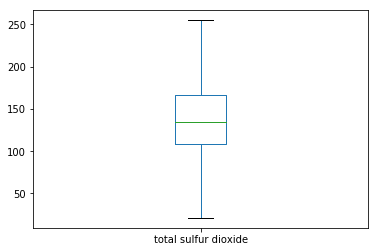

In [34]:
white.loc[(white['total sulfur dioxide']<19.5) | (white['total sulfur dioxide']>255.5),'total sulfur dioxide']=white['total sulfur dioxide'].median()
white['total sulfur dioxide'].plot.box()

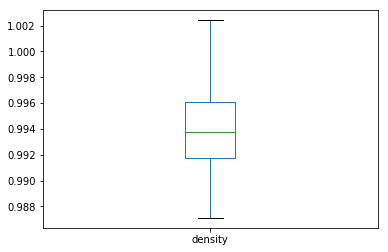

In [35]:
white.loc[(white['density']>1.0026655),'density']=white['density'].median()
white['density'].plot.box()

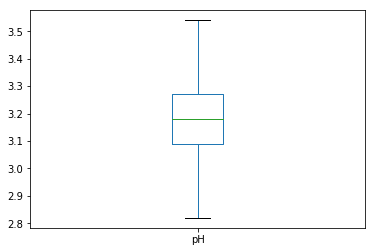

In [36]:
white.loc[(white['pH']<2.805) | (white['pH']>3.545),'pH']=white['pH'].median()
white['pH'].plot.box()

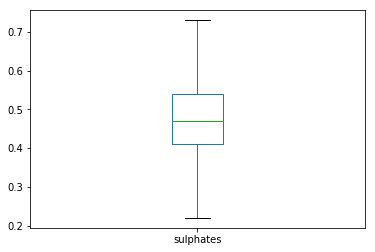

In [37]:
white.loc[(white['sulphates']>0.73),'sulphates']=white['sulphates'].median()
white['sulphates'].plot.box()

## Observations:
1. We can observe above in each of the plot,there is no outliers 
2. Compare this all plot with just previous executed code output to see the difference

# 8. Transformation:

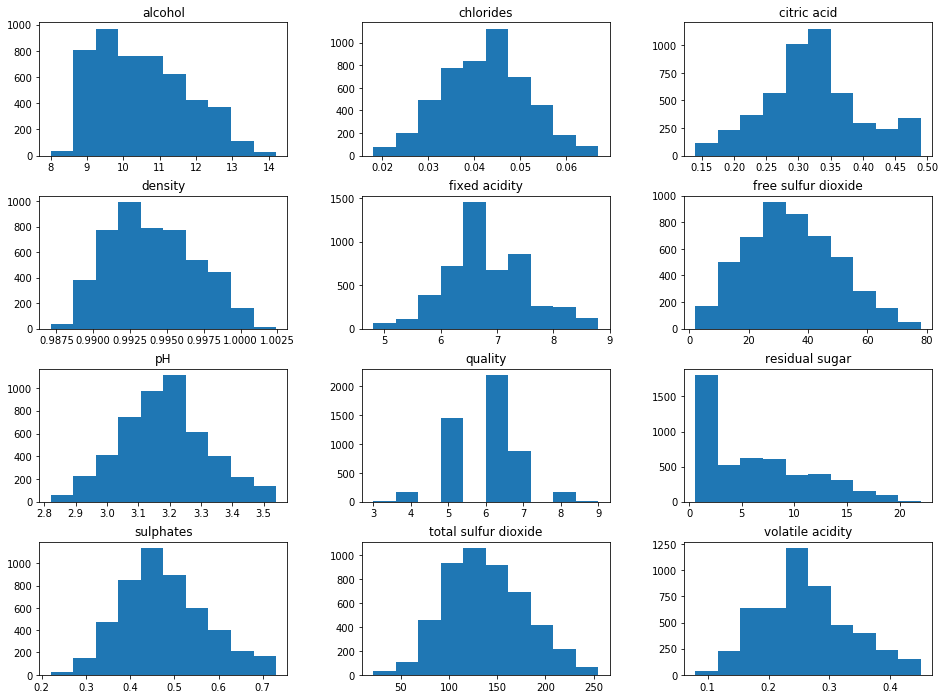

In [38]:
white.hist(figsize=(16,12),bins=10,grid=False)
plt.show()

In [39]:
#np.log(white['alcohol']).plot.hist()
#np.sqrt(white['alcohol']).plot.hist()
#np.power(white['alcohol'],1/3).plot.hist()

In [40]:
# separating independent and dependent variables

x=white.drop('quality',axis=1)
y=white['quality']

In [41]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [42]:
# StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and
# standard deviation of 1

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

In [43]:
x=pd.DataFrame(x)
x.columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
          'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.263021,0.102113,0.534973,2.900431,0.291323,0.685157,0.774562,2.414011,-1.316406,-0.288453,-1.393152
1,-0.685587,0.516144,0.268425,-0.960735,0.720531,-1.349735,-0.145310,-0.002630,0.861817,0.138904,-0.824276
2,1.753691,0.240123,1.068069,0.110688,0.827833,-0.299468,-0.992559,0.377128,0.571387,-0.395293,-0.336667
3,0.534052,-0.449929,0.001877,0.434136,1.686248,0.816440,1.161876,0.549745,0.063135,-0.822651,-0.499203
4,0.534052,-0.449929,0.001877,0.434136,1.686248,0.816440,1.161876,0.549745,0.063135,-0.822651,-0.499203


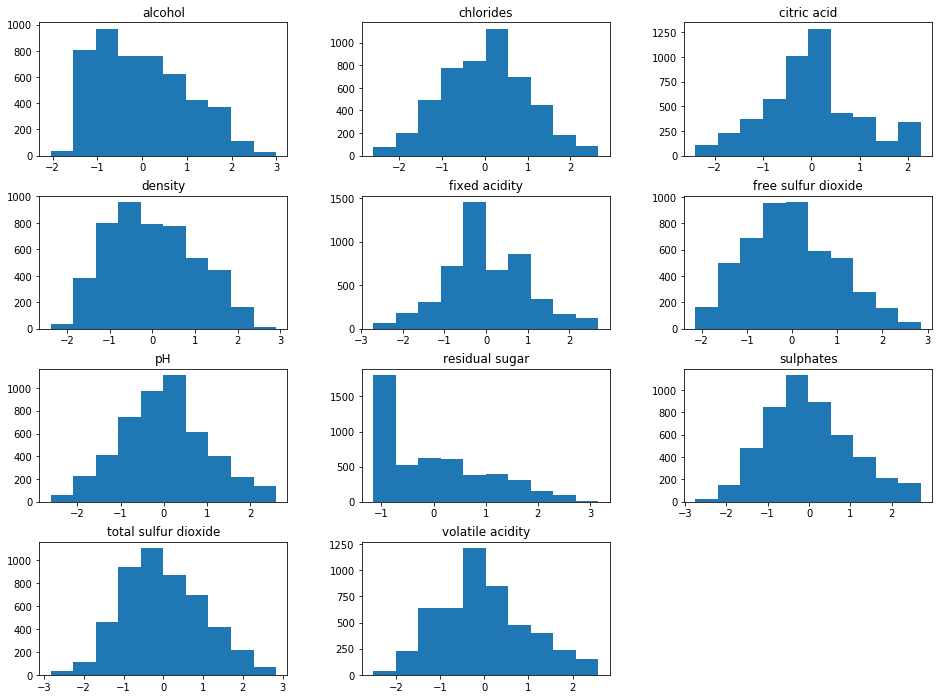

In [44]:
x.hist(figsize=(16,12),bins=10,grid=False)
plt.show()

## Observations:
1. Almost all of the histogram now is approximately <b>normally distributed</b>

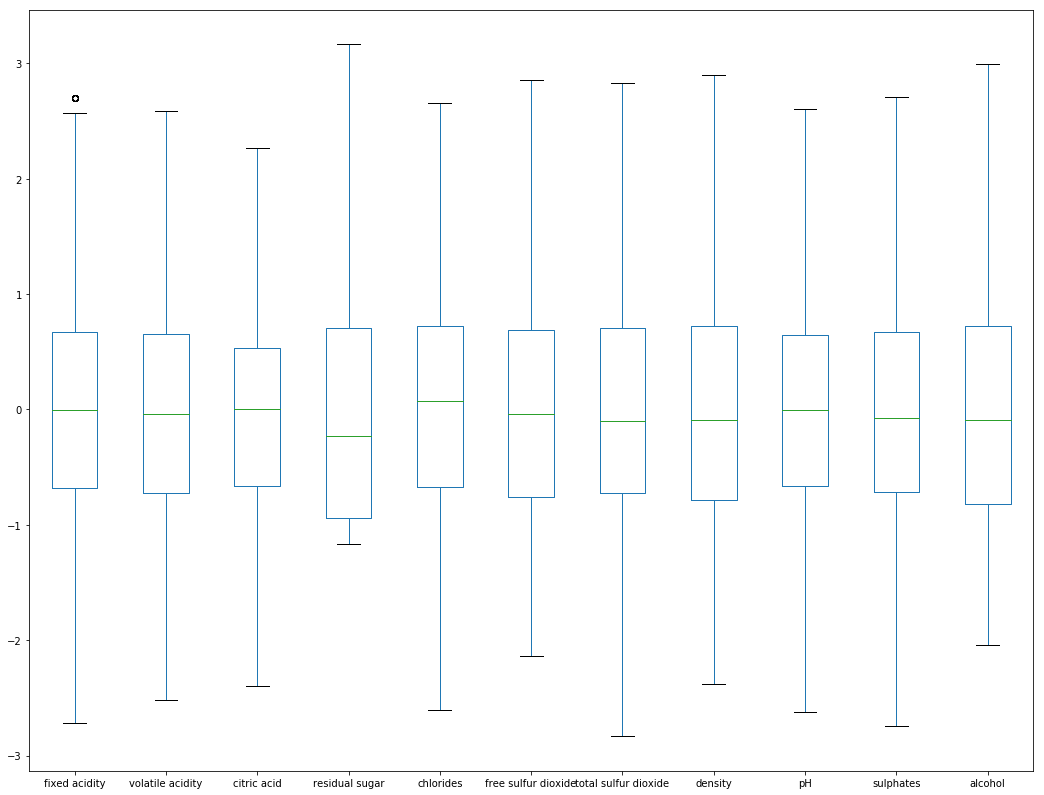

In [45]:
# there is no outliers after scaling

x.plot.box(figsize=(18,14))

# 9. Modeling:

In [46]:
# splitting the x and y data set into train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3918, 11)
(980, 11)
(3918,)
(980,)


## 9.1 Logistic Regression 
### 1. using train_test_split

In [47]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()

# fitting the model

lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
lg1=lg.predict(x_test)

In [49]:
lg.score(x_test,y_test)

0.5081632653061224

In [50]:
lg.score(x_train,y_train)

0.5400714650331802

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,lg1)

0.5081632653061224

### 2. using Cross-Validation

In [52]:
from sklearn.model_selection import cross_val_score

# directly feeding x,y

# but still accuracy is same as previous

lg_scores=cross_val_score(lg,x,y,cv=5,scoring='accuracy').mean()
lg_scores

0.5147251567180972

## 9.2 KNN
### 1. using train_test_split:

In [53]:
from sklearn.neighbors import KNeighborsClassifier

# this is for n=3 (3 nearest neighbors)

knn=KNeighborsClassifier(n_neighbors=3)

In [54]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [55]:
knn1=knn.predict(x_test)

In [56]:
knn.score(x_test,y_test)

0.5571428571428572

In [57]:
knn.score(x_train,y_train)

0.7771822358346095

In [58]:
accuracy_score(y_test,knn1)

0.5571428571428572

In [59]:
# this is for n<31 (from 1 to 30 nearest neighbors)

k_value=list(range(1,31))
k_accuracy=[]

for k in k_value:
    new_knn=KNeighborsClassifier(n_neighbors=k)
    new_knn.fit(x_train,y_train)
    predict=new_knn.predict(x_test)
    k_accuracy.append(accuracy_score(y_test,predict))
    
print(k_accuracy)

[0.6387755102040816, 0.5785714285714286, 0.5571428571428572, 0.5510204081632653, 0.5571428571428572, 0.5459183673469388, 0.5408163265306123, 0.5306122448979592, 0.5326530612244897, 0.5295918367346939, 0.5275510204081633, 0.5295918367346939, 0.5224489795918368, 0.5183673469387755, 0.5204081632653061, 0.5173469387755102, 0.5204081632653061, 0.5204081632653061, 0.5183673469387755, 0.5142857142857142, 0.5204081632653061, 0.5163265306122449, 0.5204081632653061, 0.5122448979591837, 0.5153061224489796, 0.5204081632653061, 0.5224489795918368, 0.5265306122448979, 0.5316326530612245, 0.536734693877551]


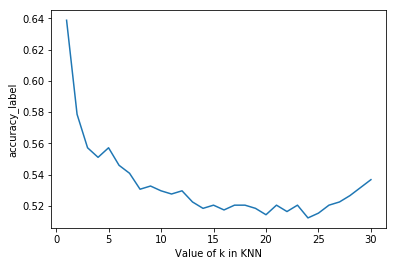

In [60]:
plt.plot(k_value,k_accuracy)
plt.xlabel("Value of k in KNN")
plt.ylabel("accuracy_label")
plt.show()

### 2. using Cross-Validation:

In [61]:
# this is for n=3 (already taken above)

knn_scores=cross_val_score(knn,x,y,cv=5,scoring='accuracy').mean()
knn_scores

0.4332854088709648

In [62]:
# testing for n<31

k_range=list(range(1,31))
scores_all=[]

for k in k_range:
    knn_new=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn_new,x,y,cv=5,scoring='accuracy')
    scores_all.append(scores.mean())
    
print(scores_all)

[0.44754967903373055, 0.4416581851216687, 0.4332854088709648, 0.46002389458813486, 0.45798641063900086, 0.4724799805290121, 0.47329235057937546, 0.48104829369131563, 0.4747142483191659, 0.47593498456398375, 0.4775620155944031, 0.48531629315578695, 0.4824610238834845, 0.4885872327955966, 0.4889910158543821, 0.4865476659510543, 0.4949189859617699, 0.49103955114624986, 0.49410245139687364, 0.49614368762082417, 0.5006364113345756, 0.5036978502400754, 0.4932794613877521, 0.49675489745249896, 0.4932811294908763, 0.48960764989284955, 0.4885843203156199, 0.49265887086903576, 0.4959231393726323, 0.5034829278515406]


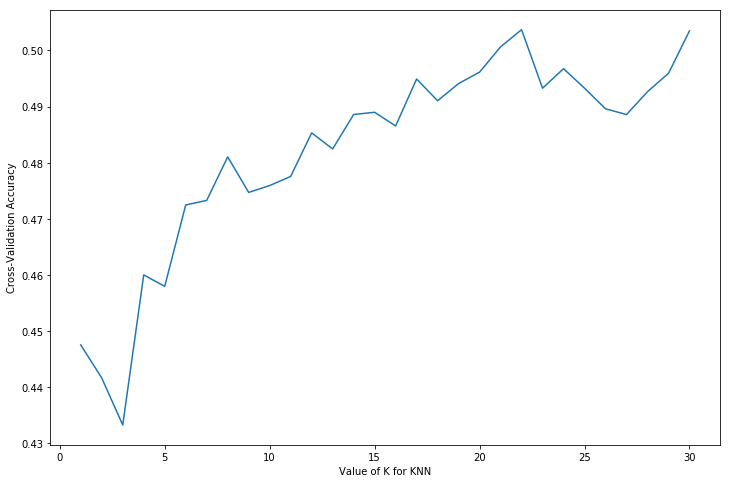

In [63]:
plt.figure(figsize=(12,8))
plt.plot(k_range,scores_all)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

# 9.3 Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

In [65]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
dt1=dt.predict(x_test)

In [67]:
dt.score(x_test,y_test)

0.613265306122449

In [68]:
dt.score(x_train,y_train)

1.0

## Observation:
1. We can easily see the score of model on test and train data and score of train dataset imply that model is <b>overfitting</b>

In [69]:
accuracy_score(y_test,dt1)

0.613265306122449

# 9.4 Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=10)

In [71]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
rfc1=rfc.predict(x_test)

In [73]:
rfc.score(x_train,y_train)

0.987493619193466

In [74]:
rfc.score(x_test,y_test)

0.6540816326530612

In [75]:
accuracy_score(y_test,rfc1)

0.6540816326530612